<a href="https://colab.research.google.com/github/garenoo/2023MLProgramming/blob/main/6_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
# 너무 많은 데이터로 인해 저장공간이 부족한 경우, 군집이나 분류에 영향을 끼치지 않으면서 데이터의 용량 줄여보기
# 차원 축소
# 1차원 배열, 요소 5개 - 5차원 벡터

In [25]:
# 특성이 많으면
  # 장점: 선형 모델의 성능이 높아짐
  # 단점1: 훈련 데이터에 쉽게 과대적합
  # 단점2: 데이터 용량이 급격히 증가하여 저장공간이 부족
  # 단점3: 모델 처리속도가 떨어짐

In [26]:
# 차원 축소는 데이터를 가장 잘 나타내는 일부 특성만을 선택하여 데이터 크기를 줄이고 지도 학습 모델의 성능을 향상시킬 수 있음
# 줄어든 차원에서 다시 원본 차원으로 손실을 최대한 줄이면서 복원

# 주성분 분석(PCA, Principal component analysis)
  # 대표적인 차원 축소 알고리즘
  # 데이터에 있는 분산이 큰 방향을 찾는 것
  # 분산은 데이터가 널리 퍼져있는 정도
  # 분산이 큰 방향이란 데이터를 잘 표현하는 어떤 벡터(데이터를 표현하는데 적합)

In [27]:
# 찾은 직선(벡터)이 원점에서 출발하면 주성분이라 부름
# 사이킷런의 PCA 모델은 특성마다 평균값을 빼서 원점에 자동으로 맞춤

# ex) 점 S(4, 2)는 주성분 벡터에 직각이 되는 위치인 점 P(4, 5)로 투영 가능
  # 물론 손실이 발생하지만 차원이 축소됨

In [28]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2023-10-30 02:06:58--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-10-30 02:06:58--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-10-30 02:06:59--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [29]:
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [31]:
# n_components: 주성분의 개수를 지정하는데 필수로 사용해야 하는 매개변수
# 첫번째 차원은 50, 즉 50개의 주성분을 찾음
# 두번째 차원은 항상 원본 데이터의 특성 개수와 같으므로 10000
# 주의할 점: 주성분 벡터의 크기는 원본 데이터와 동일

# 주성분을 이미지로 출력해보기
# draw_fruits()

In [32]:
print(pca.components_.shape)

(50, 10000)


In [33]:
(50, 10000)
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그림. 샘플 개수를 10으로 나누어 전체 행 개수를 계산
    # ceil: 올림
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수. 그렇지 않으면 10개
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

In [34]:
# 원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타냄
# 데이터 세트에 있는 어떤 특징을 잡아낸 것으로 생각할 수 있음

# 찾아낸 주 성분을 이용하여 원본데이터의 특성을 50으로 줄이기
print(fruits_2d.shape)
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 10000)
(300, 50)


크기 가 줄으면 손실이 발생했을 수 있으니 확인해보기 위해 원본 데이터 재구성

In [35]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


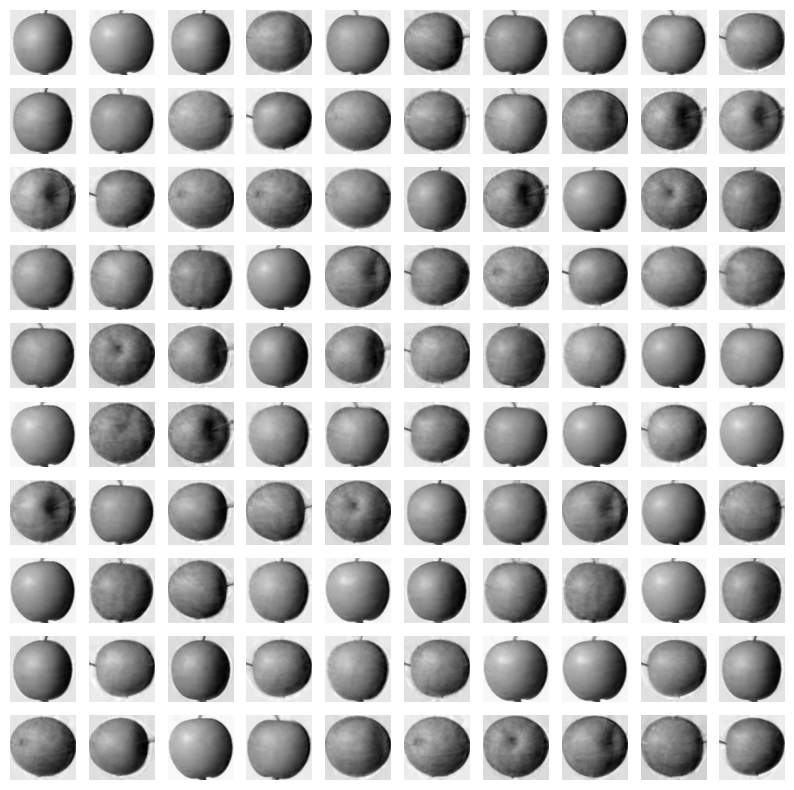

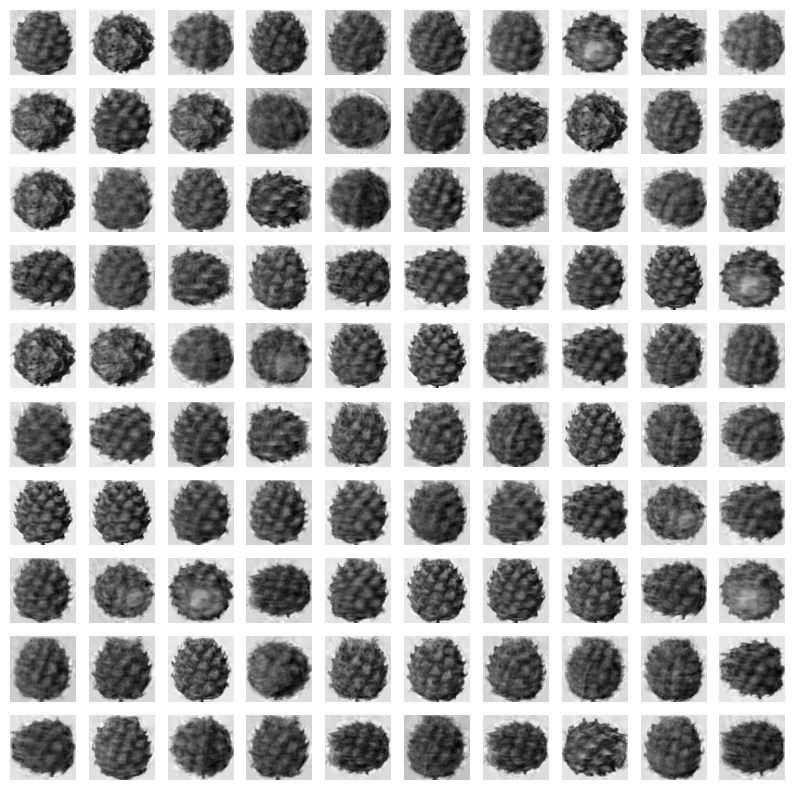

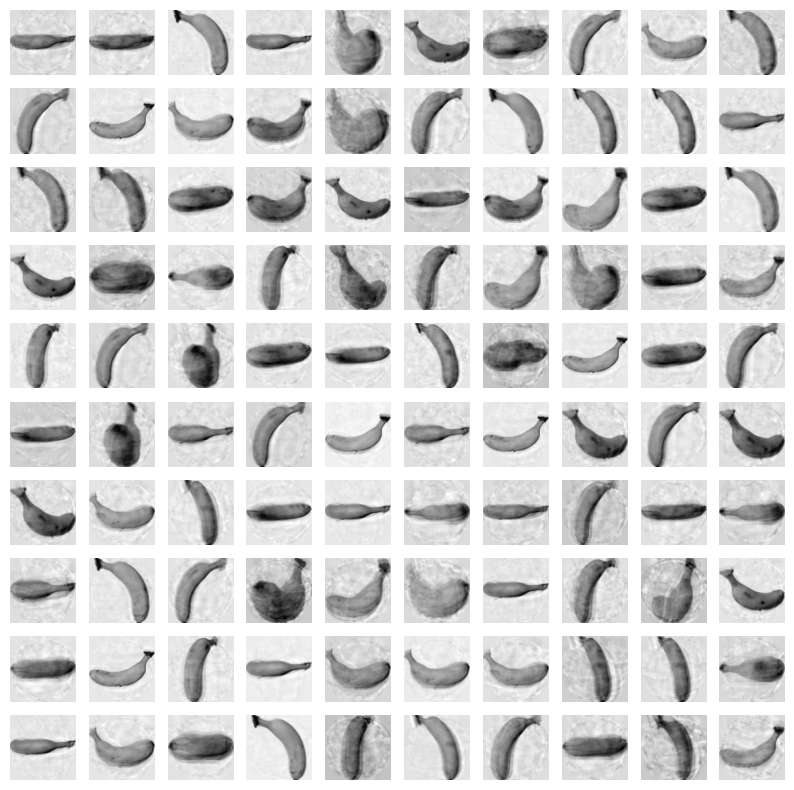

In [36]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

In [ ]:
# 주성분을 최대로 사용하면 거의 완벽하게 원본 데이터 재구성 가능

설명된 분산

In [ ]:
# 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값
# PCA 클래스의 explained_variance_ratio_에 각 주성분의 설명된 분산 비율이 기록되어 있음
# 이 분산 비율을 모두 더하면 50개의 주성분으로 표현하고 있는 총 분산 비율을 얻을 수 있음

In [39]:
print(np.sum(pca.explained_variance_ratio_))

0.9215670729690215


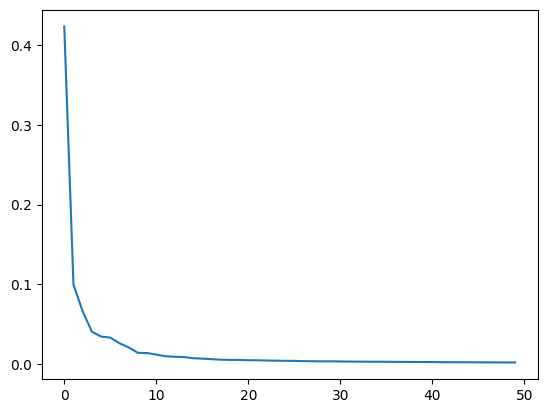

In [38]:
plt.plot(pca.explained_variance_ratio_)

In [ ]:
# 처음 10개의 주성분이 대부분의 분산을 표현하고 있음

과일 사진 원본 데이터와 PCA로 축소한 데이터를 지도학습에 적용하고 차이 찾아보기

In [ ]:
# 3개의 과일 사진을 분류해야 하므로 로지스틱 회귀 모델을 사용해봄
# 지도 학습 모델이므로 타깃값 설정
# 사과=0, 파인애플=1, 바나나=2

In [40]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [41]:
# 원본 데이터인 fruits_2d 사용
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time'])) # 초 단위

0.9966666666666667
2.1656003475189207


In [43]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.06654114723205566


In [ ]:
# PCA로 훈련 데이터의 차원을 축소하면 저장공간 뿐 아니라 머신러닝 모델의 훈련속도도 높일 수 있음

# 주성분의 개수 대신 분산의 비율로 주성분 찾기(n_components)
# 설명된 분산의 50%에 달하는 주성분 찾기

2
0.5229877245800599


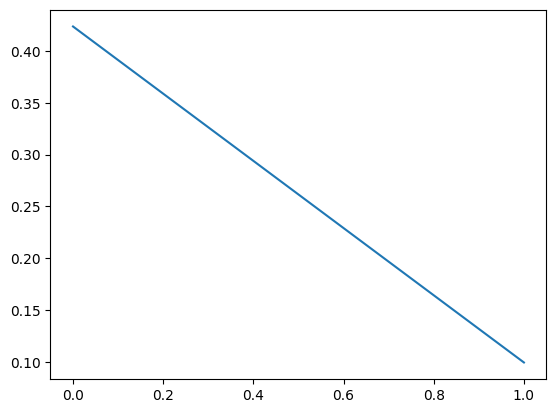

In [48]:
# PCA로 축소한 fruits_pca 사용
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)
print(pca.n_components_)
print(np.sum(pca.explained_variance_ratio_))
plt.plot(pca.explained_variance_ratio_)
plt.show()

원본 데이터 변환

In [50]:
fruits_pca=pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [51]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

# 2개의 특성만으로도 99%의 정확도 달성

0.9933333333333334
0.03559093475341797


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
# 차원 축소된 데이터를 사용해 k-평균 알고리즘으로 클러스터 찾기

In [52]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# 2절에서 원본데이터를 사용했을때와 거의 비슷한 결과
# (array([0,1,2], dtype=int32), array([112,98,90]))

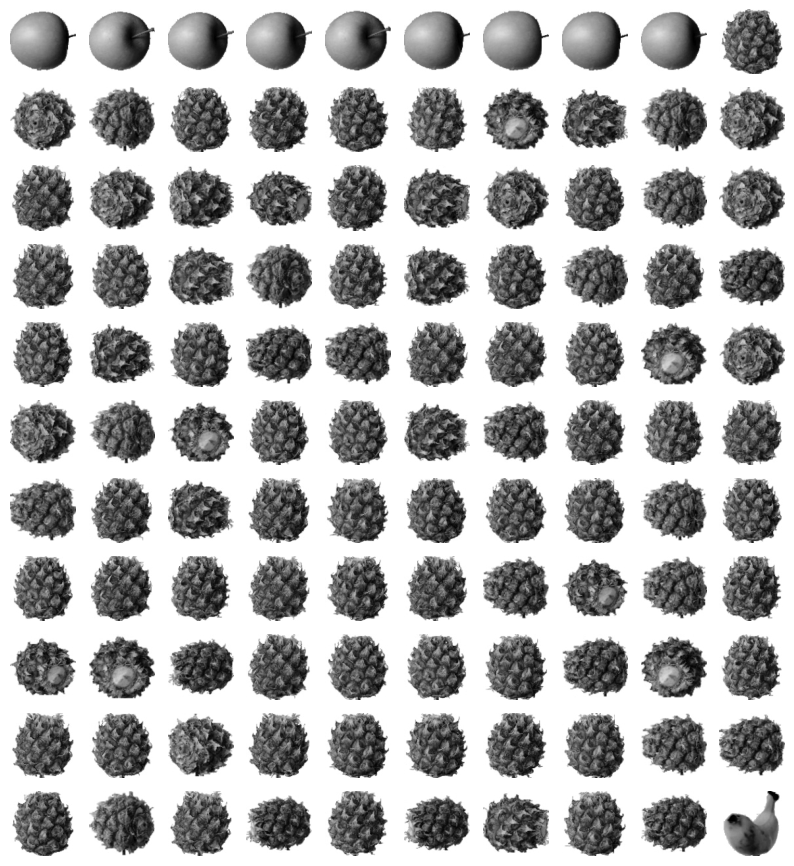

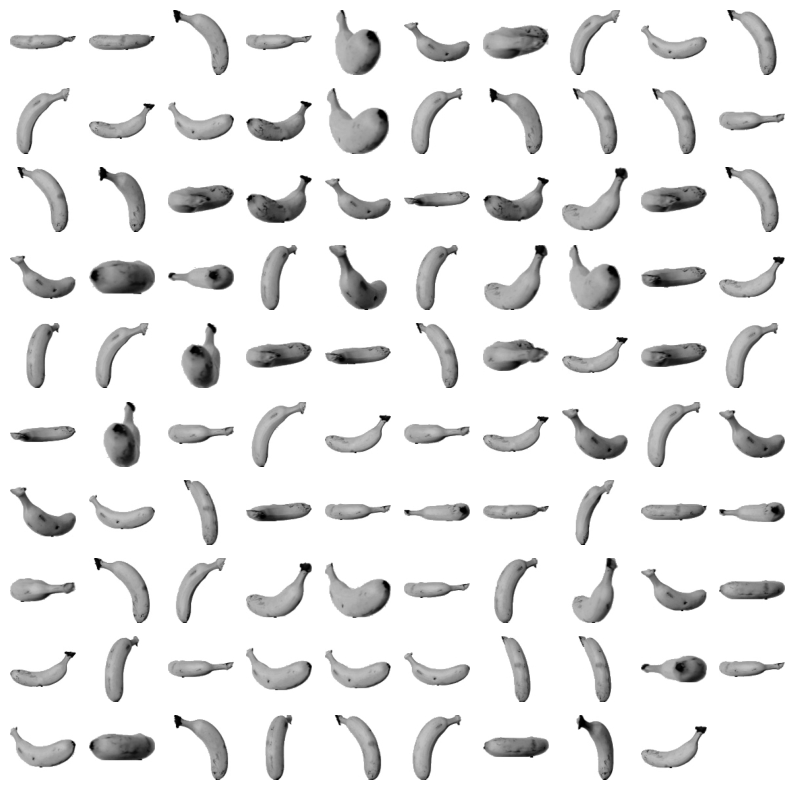

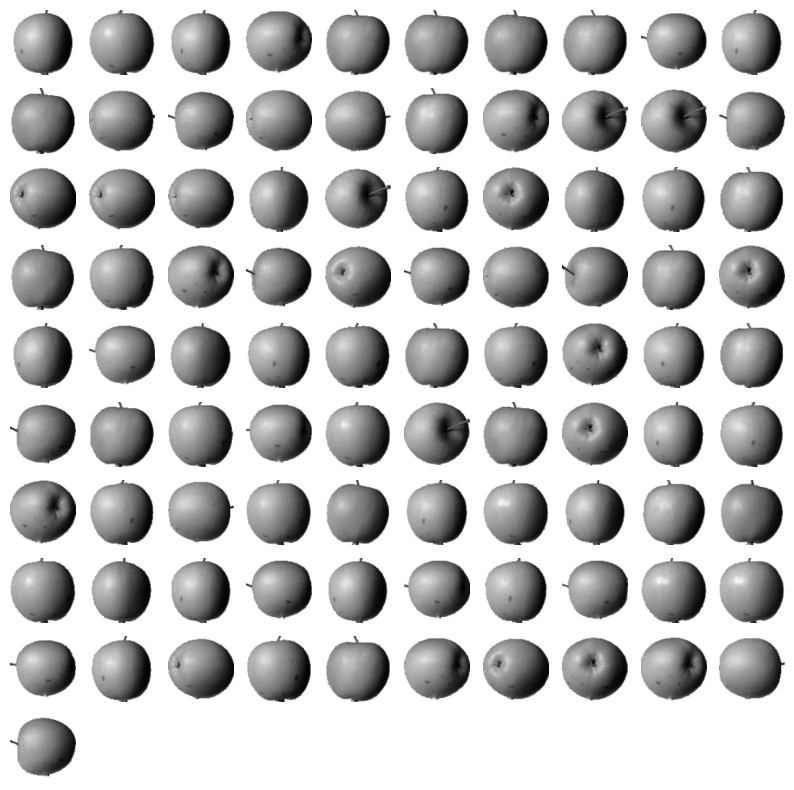

In [53]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

In [ ]:
# 훈련 데이터의 차원 축소의 장점 중 하나는 시각화
# 3개 이하로 차원을 줄이면 화면에 출력하기 쉬움
# k

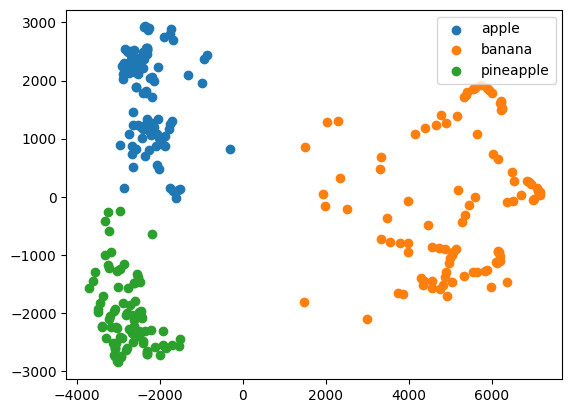

In [54]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()

In [ ]:
# 각 클러스터의 산점도가 잘 구분됨

In [ ]:
# 파인애플 클러스터의 경계와 가까운 샘플이 틀림

# 데이터를 시각화하면 예상치 못한 통찰을 얻을 수 있음

# 차원 축소의 장점
# 1. 과대적합억제
# 2. 저장 공간 확보
# 3. 모델 처리속도 상승
# 4. 모델 성능 상승
# 5. 시각화 가능